<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#The-five-classifiers" data-toc-modified-id="The-five-classifiers-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>The five classifiers</a></span><ul class="toc-item"><li><span><a href="#Classifier-1---using-keywords-to-identify-negative-comments" data-toc-modified-id="Classifier-1---using-keywords-to-identify-negative-comments-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Classifier 1 - using keywords to identify negative comments</a></span></li><li><span><a href="#Classifier-2---using-keywords-to-identify-positive-comments" data-toc-modified-id="Classifier-2---using-keywords-to-identify-positive-comments-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Classifier 2 - using keywords to identify positive comments</a></span></li><li><span><a href="#Classifier-3---using-less-keywords-to-identify-negative-comments" data-toc-modified-id="Classifier-3---using-less-keywords-to-identify-negative-comments-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Classifier 3 - using less keywords to identify negative comments</a></span></li><li><span><a href="#Classifier-4---using-less-keywords-to-identify-positive-comments" data-toc-modified-id="Classifier-4---using-less-keywords-to-identify-positive-comments-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Classifier 4 - using less keywords to identify positive comments</a></span></li><li><span><a href="#Classifier-5---using-keywords-+-length-to-identify-negative-comments" data-toc-modified-id="Classifier-5---using-keywords-+-length-to-identify-negative-comments-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Classifier 5 - using keywords + length to identify negative comments</a></span></li></ul></li><li><span><a href="#Evaluating-models" data-toc-modified-id="Evaluating-models-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Evaluating models</a></span><ul class="toc-item"><li><span><a href="#Class-imbalance" data-toc-modified-id="Class-imbalance-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Class imbalance</a></span></li><li><span><a href="#Evaluating-models-with-20%-holdout" data-toc-modified-id="Evaluating-models-with-20%-holdout-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Evaluating models with 20% holdout</a></span></li><li><span><a href="#Cross-validation" data-toc-modified-id="Cross-validation-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Cross validation</a></span></li><li><span><a href="#Type-I-&amp;-II-Errors" data-toc-modified-id="Type-I-&amp;-II-Errors-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Type I &amp; II Errors</a></span></li></ul></li></ul></div>

# Goal

It's time to revisit your classifier from the previous assignment. Using the evaluation techniques we've covered here, look at your classifier's performance in more detail. Then go back and iterate by engineering new features, removing poor features, or tuning parameters. Repeat this process until you have five different versions of your classifier. Once you've iterated, answer these questions to compare the performance of each:

* Do any of your classifiers seem to overfit?

* Which seem to perform the best? Why?

* Which features seemed to be most impactful to performance?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

#Load data
data_yelp = pd.read_table('sentiment\yelp_labelled.txt',header=None)
data_yelp.columns = ['message', 'sentiment']


# The five classifiers

## Classifier 1 - using keywords to identify negative comments

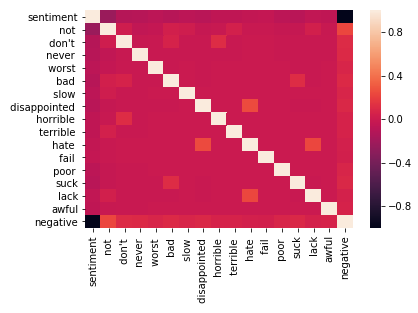

Number of mislabeled points out of a total 1000 points: 352


In [2]:
#Classifier version 1
data_1 = data_yelp.iloc[:, 0:2]
keywords = [' not ', " don't ", ' never ', ' worst ', ' bad ', ' slow ',
            ' disappointed ', ' horrible ', ' terrible ', ' hate ',
            ' fail ', ' poor ', 'suck', 'lack', 'awful']

for key in keywords:
    data_1[str(key)] = data_1.message.str.contains(str(key), case=False)

data_1['negative'] = (data_1['sentiment'] == 0)

sns.heatmap(data_1.corr())
plt.show()

data_v1 = data_1[keywords]
target_v1 = data_1['negative']

bnb1 = BernoulliNB()
bnb1.fit(data_v1, target_v1)
y_pred_v1 = bnb1.predict(data_v1)
print('Number of mislabeled points out of a total {} points: {}'.format(
        data_v1.shape[0], (target_v1 != y_pred_v1).sum()))


## Classifier 2 - using keywords to identify positive comments

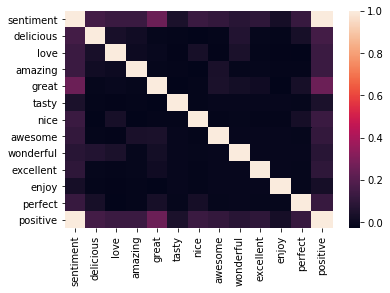

Number of mislabeled points out of a total 1000 points: 317


In [3]:
#Classifier version 2
data_2 = data_yelp.iloc[:, 0:2]
keywords_pos = ['delicious', 'love', 'amazing', 'great', 'tasty', 'nice',
            'awesome', 'wonderful', 'excellent', 'enjoy', 'perfect']

for key in keywords_pos:
    data_2[str(key)] = data_2.message.str.contains(str(key), case=False)

data_2['positive'] = (data_2['sentiment'] == 1)

sns.heatmap(data_2.corr())
plt.show()

data_v2 = data_2[keywords_pos]
target_v2 = data_2['positive']

bnb2 = BernoulliNB()
bnb2.fit(data_v2, target_v2)
y_pred_v2 = bnb2.predict(data_v2)
print('Number of mislabeled points out of a total {} points: {}'.format(
        data_v2.shape[0], (target_v2 != y_pred_v2).sum()))


## Classifier 3 - using less keywords to identify negative comments

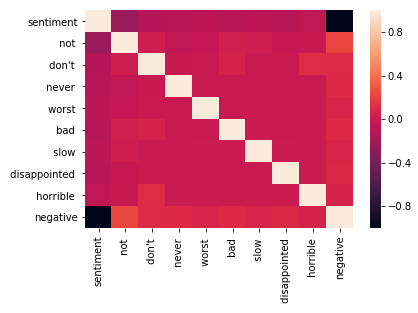

Number of mislabeled points out of a total 1000 points: 375


In [4]:
#Classifier version 3
data_3 = data_yelp.iloc[:, 0:2]
keywords_3 = [' not ', " don't ", ' never ', ' worst ', ' bad ', ' slow ',
            ' disappointed ', ' horrible ']

for key in keywords_3:
    data_3[str(key)] = data_3.message.str.contains(str(key), case=False)

data_3['negative'] = (data_3['sentiment'] == 0)

sns.heatmap(data_3.corr())
plt.show()

data_v3 = data_3[keywords_3]
target_v3 = data_3['negative']

bnb3 = BernoulliNB()
bnb3.fit(data_v3, target_v3)
y_pred_v3 = bnb3.predict(data_v3)
print('Number of mislabeled points out of a total {} points: {}'.format(
        data_v3.shape[0], (target_v3 != y_pred_v3).sum()))


## Classifier 4 - using less keywords to identify positive comments

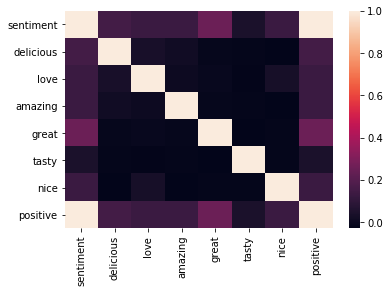

Number of mislabeled points out of a total 1000 points: 354


In [5]:
#Classifier version 4
data_4 = data_yelp.iloc[:, 0:2]
keywords_4 = ['delicious', 'love', 'amazing', 'great', 'tasty', 'nice']

for key in keywords_4:
    data_4[str(key)] = data_4.message.str.contains(str(key), case=False)

data_4['positive'] = (data_4['sentiment'] == 1)

sns.heatmap(data_4.corr())
plt.show()

data_v4 = data_4[keywords_4]
target_v4 = data_4['positive']

bnb4 = BernoulliNB()
bnb4.fit(data_v4, target_v4)
y_pred_v4 = bnb4.predict(data_v4)
print('Number of mislabeled points out of a total {} points: {}'.format(
        data_v4.shape[0], (target_v4 != y_pred_v4).sum()))


## Classifier 5 - using keywords + length to identify negative comments

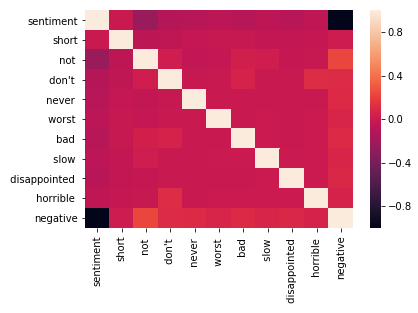

Number of mislabeled points out of a total 1000 points: 375


In [6]:
#Classifier version 5
data_5 = data_yelp.copy()
data_5['short'] = np.where(data_5['message'].str.len() < 30, 1, 0)

keywords_5 = [' not ', " don't ", ' never ', ' worst ', ' bad ', ' slow ',
            ' disappointed ', ' horrible ']

for key in keywords_5:
    data_5[str(key)] = data_5.message.str.contains(str(key), case=False)

data_5['negative'] = (data_5['sentiment'] == 0)

sns.heatmap(data_5.corr())
plt.show()

data_v5 = data_5[keywords_5 + ['short']]
target_v5 = data_5['negative']

bnb5 = BernoulliNB()
bnb5.fit(data_v5, target_v5)
y_pred_v5 = bnb5.predict(data_v5)
print('Number of mislabeled points out of a total {} points: {}'.format(
        data_v5.shape[0], (target_v5 != y_pred_v5).sum()))


# Evaluating models

## Class imbalance

In [7]:
count = data_yelp['sentiment'].value_counts()
print('Positive comments: {}\nNegative comments: {}'.format(count[1], count[0]))

Positive comments: 500
Negative comments: 500


There's no class imbalance, so great! We don't need to worry about that.

## Evaluating models with 20% holdout

In [8]:
#With 20% holdout
X_train1, X_test1, y_train1, y_test1 = train_test_split(data_v1, target_v1,
                                                        test_size=0.2, random_state=20)
print('Classifier 1 With 20% Holdout: ' + 
      str(bnb1.fit(X_train1, y_train1).score(X_test1, y_test1)))


X_train2, X_test2, y_train2, y_test2 = train_test_split(data_v2, target_v2,
                                                        test_size=0.2, random_state=20)
print('Classifier 2 With 20% Holdout: ' + 
      str(bnb2.fit(X_train2, y_train2).score(X_test2, y_test2)))


X_train3, X_test3, y_train3, y_test3 = train_test_split(data_v3, target_v3,
                                                        test_size=0.2, random_state=20)
print('Classifier 3 With 20% Holdout: ' + 
      str(bnb3.fit(X_train3, y_train3).score(X_test3, y_test3)))


X_train4, X_test4, y_train4, y_test4 = train_test_split(data_v4, target_v4,
                                                        test_size=0.2, random_state=20)
print('Classifier 4 With 20% Holdout: ' + 
      str(bnb4.fit(X_train4, y_train4).score(X_test4, y_test4)))


X_train5, X_test5, y_train5, y_test5 = train_test_split(data_v5, target_v5,
                                                        test_size=0.2, random_state=20)
print('Classifier 5 With 20% Holdout: ' + 
      str(bnb5.fit(X_train5, y_train5).score(X_test5, y_test5)))


Classifier 1 With 20% Holdout: 0.605
Classifier 2 With 20% Holdout: 0.685
Classifier 3 With 20% Holdout: 0.59
Classifier 4 With 20% Holdout: 0.65
Classifier 5 With 20% Holdout: 0.59


## Cross validation

In [9]:
print('Scores of Classifier 1 with 10 cross validations: ', cross_val_score(bnb1, data_v1, target_v1, cv=10))
print('Scores of Classifier 2 with 10 cross validations: ', cross_val_score(bnb2, data_v2, target_v2, cv=10))
print('Scores of Classifier 3 with 10 cross validations: ', cross_val_score(bnb3, data_v3, target_v3, cv=10))
print('Scores of Classifier 4 with 10 cross validations: ', cross_val_score(bnb4, data_v4, target_v4, cv=10))
print('Scores of Classifier 5 with 10 cross validations: ', cross_val_score(bnb5, data_v5, target_v5, cv=10))


Scores of Classifier 1 with 10 cross validations:  [0.69 0.64 0.7  0.59 0.62 0.64 0.66 0.64 0.63 0.66]
Scores of Classifier 2 with 10 cross validations:  [0.67 0.66 0.63 0.65 0.7  0.65 0.69 0.65 0.7  0.74]
Scores of Classifier 3 with 10 cross validations:  [0.66 0.61 0.69 0.6  0.62 0.61 0.63 0.61 0.6  0.62]
Scores of Classifier 4 with 10 cross validations:  [0.67 0.62 0.65 0.64 0.67 0.62 0.63 0.61 0.65 0.7 ]
Scores of Classifier 5 with 10 cross validations:  [0.66 0.61 0.69 0.6  0.62 0.61 0.63 0.61 0.6  0.62]


## Type I & II Errors

In [10]:
#Confusion matrix
cm1 = confusion_matrix(target_v1, y_pred_v1)
print('For Classifier 1\n',
      'Failing to identify negative comment: {}\n'.format(cm1[1, 0]),
      'Mistakenly identifying negative comment: {}\n'.format(cm1[0, 1]),
      'Sensitivity for negative comments:{}\n'.format(cm1[1, 1] / (cm1[1, 0] + cm1[1, 1])),
      'Specificity for negative comments:{}\n'.format(cm1[0, 0] / (cm1[0, 0] + cm1[0, 1])))

cm2 = confusion_matrix(target_v2, y_pred_v2)
print('For Classifier 2\n',
      'Failing to identify positive comment: {}\n'.format(cm2[1, 0]),
      'Mistakenly identifying positive comment: {}\n'.format(cm2[0, 1]),
      'Sensitivity for positive comments:{}\n'.format(cm2[1, 1] / (cm2[1, 0] + cm2[1, 1])),
      'Specificity for positive comments:{}\n'.format(cm2[0, 0] / (cm2[0, 0] + cm2[0, 1])))

cm3 = confusion_matrix(target_v3, y_pred_v3)
print('For Classifier 3\n',
      'Failing to identify negative comment: {}\n'.format(cm3[1, 0]),
      'Mistakenly identifying negative comment: {}\n'.format(cm3[0, 1]),
      'Sensitivity for negative comments:{}\n'.format(cm3[1, 1] / (cm3[1, 0] + cm3[1, 1])),
      'Specificity for negative comments:{}\n'.format(cm3[0, 0] / (cm3[0, 0] + cm3[0, 1])))

cm4 = confusion_matrix(target_v4, y_pred_v4)
print('For Classifier 4\n',
      'Failing to identify positive comment: {}\n'.format(cm4[1, 0]),
      'Mistakenly identifying positive comment: {}\n'.format(cm4[0, 1]),
      'Sensitivity for positive comments:{}\n'.format(cm4[1, 1] / (cm4[1, 0] + cm4[1, 1])),
      'Specificity for positive comments:{}\n'.format(cm4[0, 0] / (cm4[0, 0] + cm4[0, 1])))

cm5 = confusion_matrix(target_v5, y_pred_v5)
print('For Classifier 5\n',
      'Failing to identify negative comment: {}\n'.format(cm5[1, 0]),
      'Mistakenly identifying negative comment: {}\n'.format(cm5[0, 1]),
      'Sensitivity for negative comments:{}\n'.format(cm5[1, 1] / (cm5[1, 0] + cm5[1, 1])),
      'Specificity for negative comments:{}\n'.format(cm5[0, 0] / (cm5[0, 0] + cm5[0, 1])))


For Classifier 1
 Failing to identify negative comment: 328
 Mistakenly identifying negative comment: 24
 Sensitivity for negative comments:0.344
 Specificity for negative comments:0.952

For Classifier 2
 Failing to identify positive comment: 298
 Mistakenly identifying positive comment: 19
 Sensitivity for positive comments:0.404
 Specificity for positive comments:0.962

For Classifier 3
 Failing to identify negative comment: 352
 Mistakenly identifying negative comment: 23
 Sensitivity for negative comments:0.296
 Specificity for negative comments:0.954

For Classifier 4
 Failing to identify positive comment: 339
 Mistakenly identifying positive comment: 15
 Sensitivity for positive comments:0.322
 Specificity for positive comments:0.97

For Classifier 5
 Failing to identify negative comment: 352
 Mistakenly identifying negative comment: 23
 Sensitivity for negative comments:0.296
 Specificity for negative comments:0.954

